In [1]:
import ira
from tqdm.notebook import tqdm
%alphalab dark

from c3p.models.utils import load_all_contracts_data, contracts_for, bitmex_contract_expiration
from alpha.utils.tick_loaders import load_data

Reloaded /usr/local/envs/ira_p36/lib/python3.6/site-packages/ira/experimental/c_simulator_core.pyx


Some helpers stuff

In [74]:
def prepare_data(underlying):
    ctrs = contracts_for(underlying)
    symbols = {f'BITMEXH:{x.name}' for x in ctrs} | {f'BITMEXH:{underlying}',}
    return mstruct(
        underlying = underlying, ctrs = ctrs, symbols=symbols, 
        data = load_data(*symbols))

def plot_statistics(sx):
    k = 1
    for i, c in enumerate(sx.ctrs, 1):
        xd = retain_columns_and_join(sx.data[[c.name, sx.underlying]].ohlc('1h'), 'close').dropna()
        if not xd.empty:
            f = xd[c.name]
            u = xd[sx.underlying]
            dp = f - u
            dp = dp - dp.iloc[0]
            yl = 1.01 * max(abs(dp))
            sbp(53, k); 
            k += 1 
            plt.fill_between(dp.index, -yl, 0, color='r', alpha=0.3)
            plt.fill_between(dp.index, +yl, 0, color='g', alpha=0.3)
            plt.plot(dp, label=c.name); plt.legend()
            plt.axhline(0, ls='--', c='g'); plt.ylim((-yl, yl))

Load data for coins we have perpetual swaps for (actually most traded ones)

In [65]:
d_xbt = prepare_data('XBTUSD')
d_eth = prepare_data('ETHUSD')
d_ltc = prepare_data('LTCUSD')
d_eos = prepare_data('EOSUSD')

Now we will take a look at basis distance behaviour for every contract. 
Here basis at every moment of time t is defined as $B_t = F_t - U_t$.

where (F - futures price, U - underlying spot price (perpetual)). For first approximation we will use close prices for 5 Min timeframe.

if $B_t$ > 0 contract in contango (green area) and premium is high otherwise it's in backwardation (red area)

<hr/>

<u>Main objectives of this research is to findout</u>

   - how often futures contract is in contango
   - does basis converge to 0 near expiration date

# <font color='yellow'>XBTUSD</font>

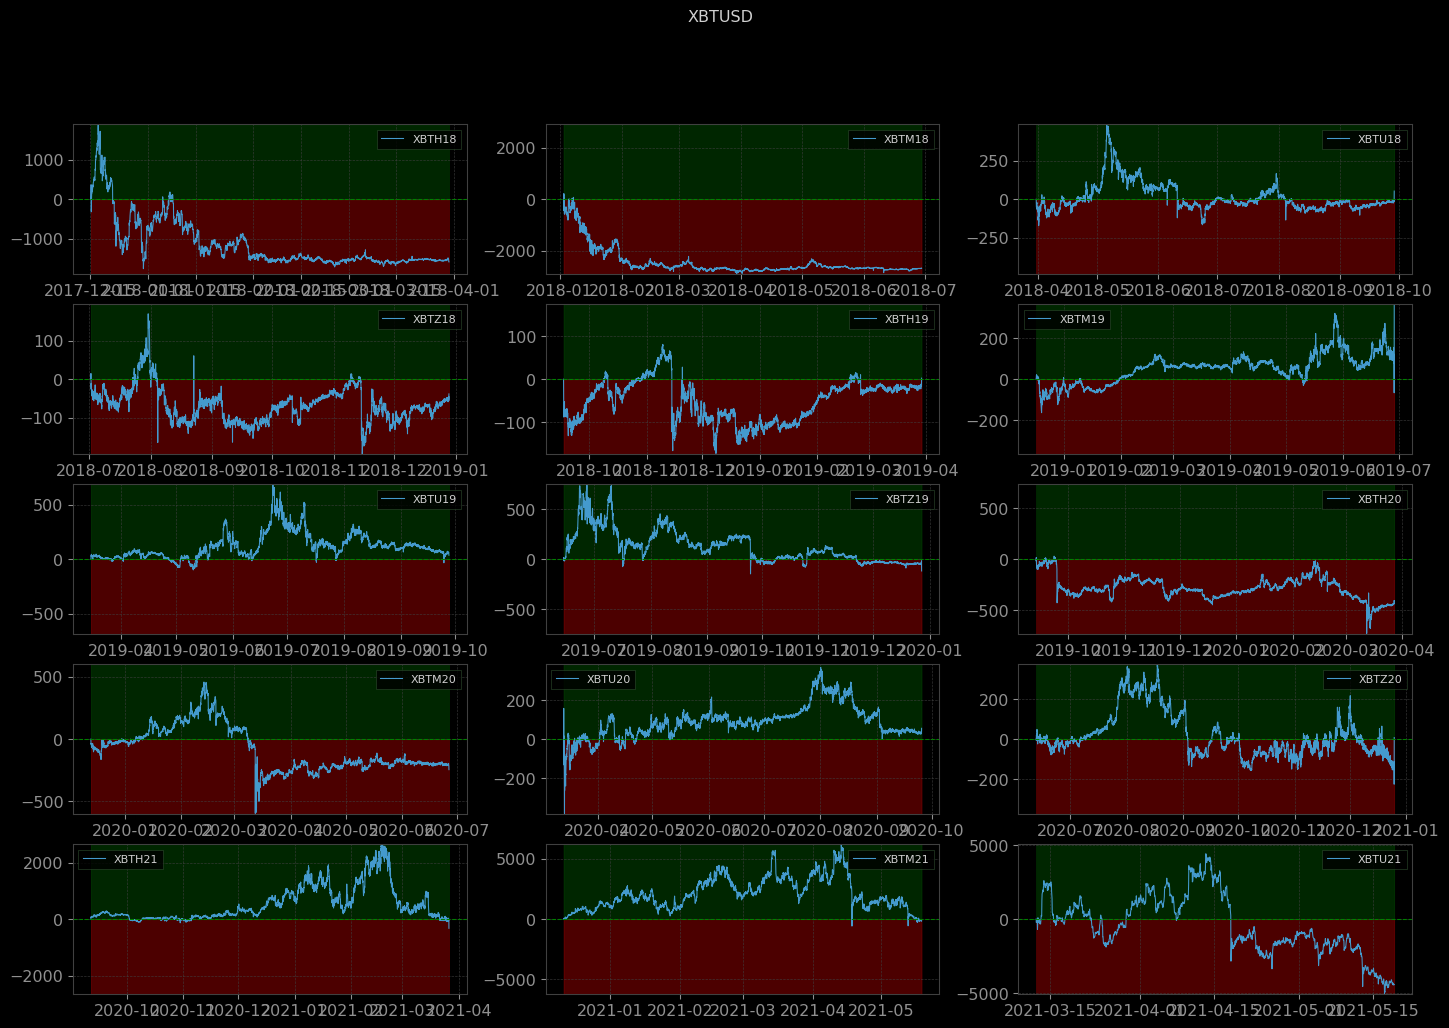

In [75]:
fig(18, 12)
plot_statistics(d_xbt)
plt.suptitle(d_xbt.underlying);

# <font color='yellow'>ETHUSD</font>

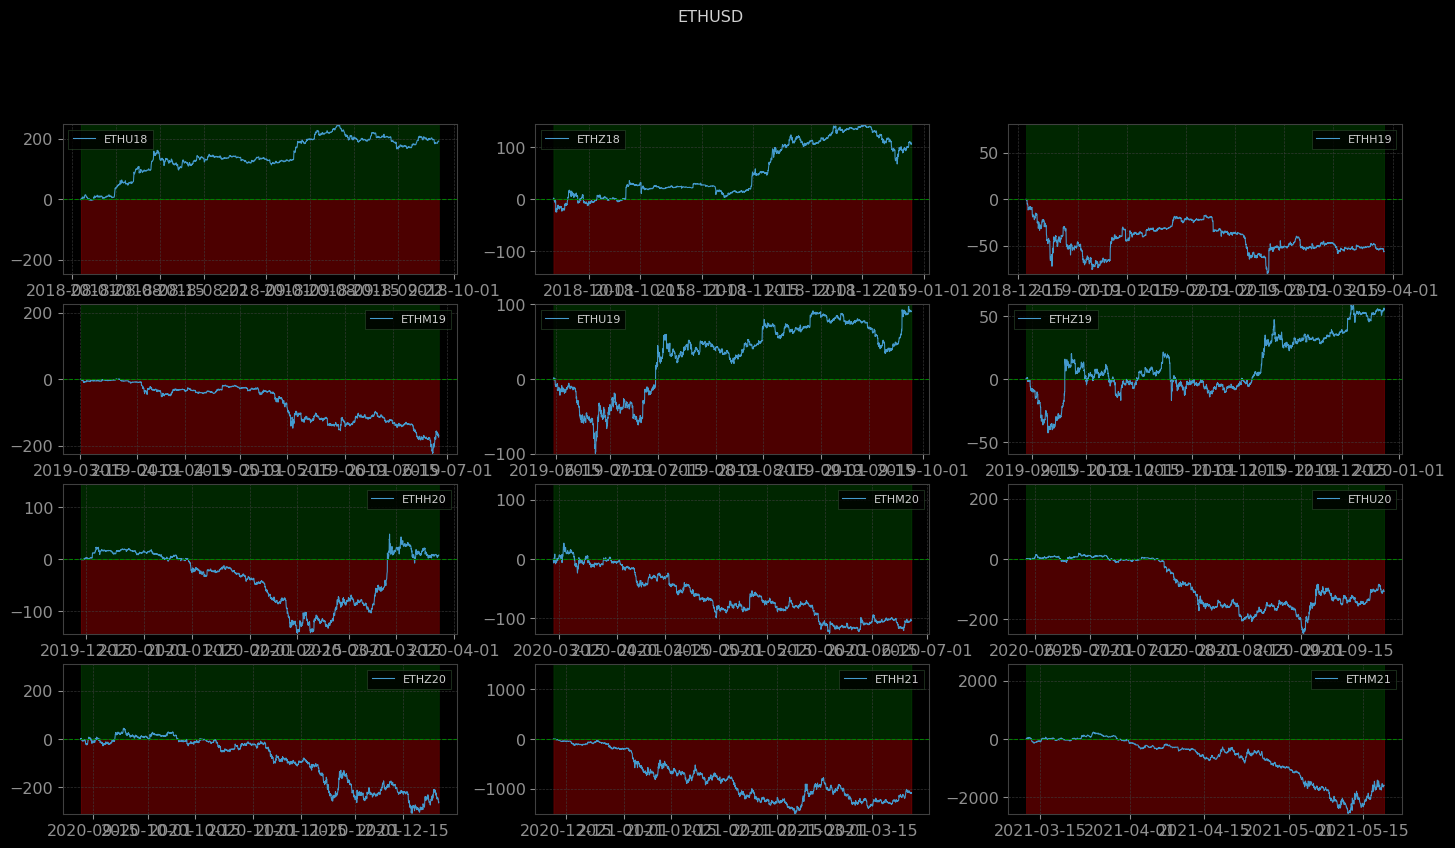

In [76]:
fig(18, 12)
plot_statistics(d_eth)
plt.suptitle(d_eth.underlying);

# <font color='yellow'>LTCUSD</font>

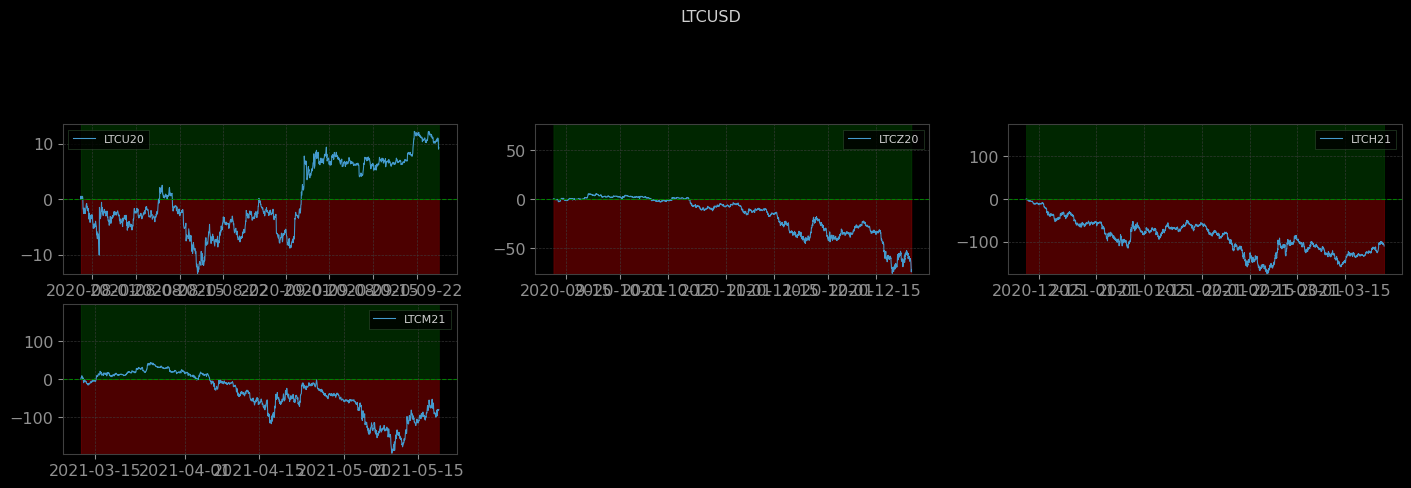

In [77]:
fig(18, 12)
plot_statistics(d_ltc)
plt.suptitle(d_ltc.underlying);

# <font color='yellow'>EOSUSD</font>

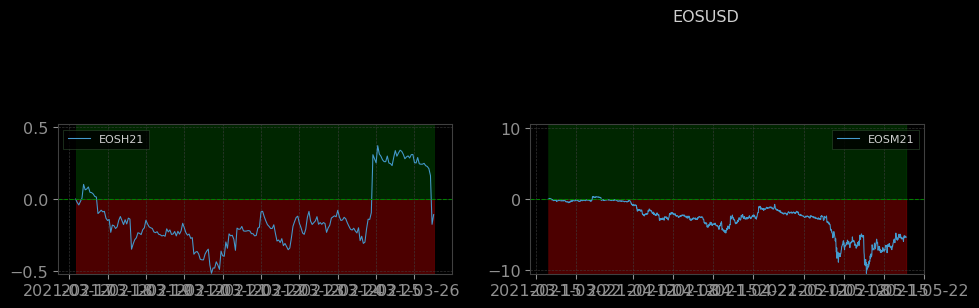

In [78]:
fig(18, 12)
plot_statistics(d_eos)
plt.suptitle(d_eos.underlying);

# <font color='green'>Some first observations</font>
<hr/>

 - xbt futures likely to be more tradeable at least on BitMex from 'sell futures' model point of view
 
 - it's difficult to select some fixed threshold to used as entry point: we observed different spreads for basis for different contracts
    - we should use dynamic threshold based on current state of basis series
    
   
 
 - basis series demonstrates mean-reverting properties so we could try to trade not only "sell futures + buy underlying" model but also try reverted: ("buy future + short sell underlying perpetual") when basis is in backwardarion 
    - for this (full) model we could also trade other assets (LTC, ETH, EOS) which demonstrate negative premium recent times
 